<a href="https://colab.research.google.com/github/davidfague/single-cell-tuning/blob/main/tuning_SST_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/davidfague/single-cell-tuning.git

Cloning into 'single-cell-tuning'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 113 (delta 55), reused 19 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (113/113), 527.91 KiB | 9.43 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
!git clone -b release_candidate https://github.com/V-Marco/ACT.git

Cloning into 'ACT'...
remote: Enumerating objects: 4392, done.
remote: Counting objects: 100% (419/419), done.
remote: Compressing objects: 100% (298/298), done.
remote: Total 4392 (delta 200), reused 265 (delta 102), pack-reused 3973 (from 1)
Receiving objects: 100% (4392/4392), 153.20 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (2018/2018), done.


In [ ]:
!pip install --upgrade pip
!pip install --quiet allensdk neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.1/973.1 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [ ]:
from allensdk.api.queries.biophysical_api import BiophysicalApi
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical.utils import Utils
import sys

import matplotlib.pyplot as plt

In [ ]:
bp = BiophysicalApi()

# PV is from: https://celltypes.brain-map.org/experiment/electrophysiology/484635029
# SST is from: https://celltypes.brain-map.org/experiment/electrophysiology/476686112

cell_to_use = 'SST'

if cell_to_use == 'SST':
    query = bp.get_neuronal_models(476686112)
    id_to_use = query[0]['id']
elif cell_to_use =='PV':
    query = bp.get_neuronal_models(484635029)
    id_to_use = query[0]['id']

print(query)

[{'id': 477878284, 'name': 'Biophysical - perisomatic_Sst-IRES-Cre;Ai14-188740.03.02.01', 'neuron_reconstruction_id': 491119369, 'neuronal_model_template_id': 329230710, 'specimen_id': 476686112}, {'id': 497232660, 'name': 'Biophysical - all active_Sst-IRES-Cre;Ai14-188740.03.02.01', 'neuron_reconstruction_id': 491119369, 'neuronal_model_template_id': 491455321, 'specimen_id': 476686112}]


In [ ]:
bp.cache_stimulus = False # Change to False to not download the large stimulus NWB file
bp.cache_data(id_to_use) # 'id'

2025-02-21 23:17:02,516 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210401
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210401
2025-02-21 23:17:03,036 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210404
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210404
2025-02-21 23:17:03,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
2025-02-21 23:17:03,345 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_fi

In [ ]:
# replace the modfiles with 'segregated' so the ion channels are 100% closed at voltages that they should not be active at
segregate_modfiles = True
if segregate_modfiles:
  import shutil
  shutil.rmtree("modfiles/")
  # !git clone -b release_candidate https://github.com/V-Marco/ACT/
  # move the modfiles from the other repo
  # https://github.com/V-Marco/ACT/tree/release_candidate/data/SST/seg/modfiles -> /content/modfiles
  !mv ACT/data/SST/seg/modfiles/ /content/modfiles/

In [ ]:
# Compile the modfiles
!nrnivmodl modfiles

# Create the h object
description = Config().load('manifest.json')
utils = Utils(description)

# convert 'values' from string to float
for dict in utils.description.data['genome']:
  for key,item in dict.items():
    if key == 'value':
      dict[key] = float(item)

h = utils.h

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/CaDynamics.mod
 -> NMODL ../modfiles/Ca_HVA.mod
 -> NMODL ../modfiles/Ca_LVA.mod
Translating CaDynamics.mod into /content/x86_64/CaDynamics.c
Thread Safe
 -> NMODL ../modfiles/Ih.mod
Translating Ca_HVA.mod into /content/x86_64/Ca_HV

In [ ]:
# Configure morphology
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))

warning ./Sst-IRES-Cre_Ai14-188740.03.02.01_657210399_m.swc: more than one tree:
  root at line 4
  root at line 14504
  root at line 14725
  root at line 14798
  root at line 15141
  root at line 15144
  root at line 15156
  root at line 15211
  root at line 15318
  root at line 15496
  root at line 15811
  root at line 15857
  root at line 15883
  root at line 16161
  root at line 16200
  root at line 16210
  root at line 16253
  root at line 16286
  root at line 16301
  root at line 16326
  root at line 16574
  root at line 16613
  root at line 16618
  root at line 16645
  root at line 16695
  root at line 16751
  root at line 16765
  root at line 16768


In [ ]:
 # defaults if missing from allen cell and also for tuning
 # could split
# user_specifications = {
#     "R-in": 100, # MOhms
#     "cm": [
#         {
#           "section": "soma",
#           "cm": 1
#         },
#         {
#           "section": "axon",
#           "cm": 1
#         },
#         {
#           "section": "dend",
#           "cm": 1
#         },
#         {
#           "section": "apic",
#           "cm": 1
#         }
#       ],
#     "e_pas": -65.75
# }

In [ ]:
# update missing properties to user_specifications if they're not already in the allen specifications
# if "e_pas" not in utils.description.data["passive"][0].keys():
#   utils.description.data["passive"][0]["e_pas"] = user_specifications["e_pas"]

# if "cm" not in utils.description.data["passive"][0].keys():
#   utils.description.data["passive"][0]["cm"] = user_specifications["cm"]

# if "ra" not in utils.description.data["passive"][0].keys():
#   utils.description.data["passive"][0]["ra"] = user_specifications["ra"]

In [ ]:
utils.description.data["passive"] # display

[{'ra': 153.714713714,
  'cm': [{'section': 'soma', 'cm': 0.55447777707},
   {'section': 'axon', 'cm': 0.55447777707},
   {'section': 'dend', 'cm': 0.55447777707}],
  'e_pas': -79.65586853027344}]

In [ ]:
# build the cell. Its parts will be assigned to the h object
utils.load_cell_parameters()

In [ ]:
sys.path.append('single-cell-tuning/')
from download_from_allen_and_tune_r_in import update_sections
from Simulation import RInSimulation

sys.path.append("ACT")
from act.passive import ACTPassiveModule

In [ ]:
# see active conductances
# utils.description.data['genome']

In [ ]:
# # can be used to update conductances
# update_sections(
#     data = utils.description.data['genome'],
#     )

# utils.load_cell_parameters()

In [ ]:
# list(h.dend[0])

# for seg in h.dend[0]:
#     print(seg)

## Define target metrics

In [ ]:
target_metrics = {
    'SST': {
        'RMP': {
            'mean': -65.75,
            'std': 3.76
        },
        'Rm (MOhm)': {
            'mean': 188.7,
            'std': 9736
        },
        'Cm (pF)': {
            'mean': 96.46,
            'std': 50.01
        },
        'Tau (ms)': {
            'mean': 15.6,
            'std': 8.6
        },
        'Sag ratio': {
            'mean': .85,
            'std': .09
        },
        'Rheobase (pA)': {
            'mean': 90,
            'std': 38.25
        },
        'Rin (MOhm)': {
            'mean': 195.4,
            'std': 75.93
        }
    },
    'PV': {
        'RMP (mV)': {
            'mean': -71.25,
            'std': 5.6
        },
        'Rm (MOhm)': {
            'mean': 88.97,
            'std': 36.3
        },
        'Cm (pF)': {
            'mean': 78,
            'std': 50.18
        },
        'Tau (ms)': {
            'mean': 5.9,
            'std': 2.9
        },
        'Sag ratio': {
            'mean': .96,
            'std': .02
        },
        'Rheobase (pA)': {
            'mean': 225,
            'std': 112.2
        },
        'Rin (MOhm)': {
            'mean': 98.9,
            'std': 34.48
        }
    }
}
target_metrics = target_metrics[cell_to_use] # selects cell to use

In [ ]:
target_metrics

{'RMP': {'mean': -65.75, 'std': 3.76},
 'Rm (MOhm)': {'mean': 188.7, 'std': 9736},
 'Cm (pF)': {'mean': 96.46, 'std': 50.01},
 'Tau (ms)': {'mean': 15.6, 'std': 8.6},
 'Sag ratio': {'mean': 0.85, 'std': 0.09},
 'Rheobase (pA)': {'mean': 90, 'std': 38.25},
 'Rin (MOhm)': {'mean': 195.4, 'std': 75.93}}

Passive Properties to match

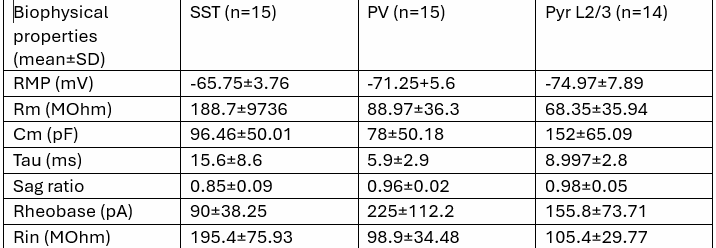

F-I curves to match

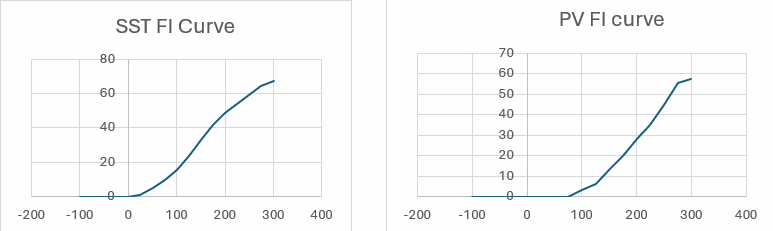

Synapse responses to match

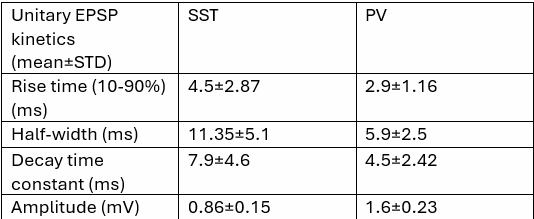

## Match passive Properties

In [ ]:
# set all conductances to 0
update_sections(
    value_to_assign = 1e-15,
    data = utils.description.data['genome'],
    sections = ['all'],
    var_to_update = ['gbar_NaV', 'gbar_Kd', 'gbar_Kv2like', 'gbar_Kv3_1', 'gbar_K_T', 'gbar_Im_v2', 'gbar_SK', 'gbar_Ca_HVA',
                     'gbar_Ca_LVA'] #['all']
    )

# rebuild the cell
utils.load_cell_parameters()

 updating entry: {'section': 'soma', 'name': 'gbar_NaV', 'value': 0.05118910631895057, 'mechanism': 'NaV'}
 updating entry: {'section': 'soma', 'name': 'gbar_Kd', 'value': 8.903838040127954e-11, 'mechanism': 'Kd'}
 updating entry: {'section': 'soma', 'name': 'gbar_Kv2like', 'value': 0.0002725790772869774, 'mechanism': 'Kv2like'}
 updating entry: {'section': 'soma', 'name': 'gbar_Kv3_1', 'value': 0.10521580755926842, 'mechanism': 'Kv3_1'}
 updating entry: {'section': 'soma', 'name': 'gbar_K_T', 'value': 0.007838697435023162, 'mechanism': 'K_T'}
 updating entry: {'section': 'soma', 'name': 'gbar_Im_v2', 'value': 2.8103810231817594e-07, 'mechanism': 'Im_v2'}
 updating entry: {'section': 'soma', 'name': 'gbar_SK', 'value': 3.095338402020649e-08, 'mechanism': 'SK'}
 updating entry: {'section': 'soma', 'name': 'gbar_Ca_HVA', 'value': 0.0008814678006675907, 'mechanism': 'Ca_HVA'}
 updating entry: {'section': 'soma', 'name': 'gbar_Ca_LVA', 'value': 0.002604826842658681, 'mechanism': 'Ca_LVA'}


In [ ]:
target_metrics

{'RMP': {'mean': -65.75, 'std': 3.76},
 'Rm (MOhm)': {'mean': 188.7, 'std': 9736},
 'Cm (pF)': {'mean': 96.46, 'std': 50.01},
 'Tau (ms)': {'mean': 15.6, 'std': 8.6},
 'Sag ratio': {'mean': 0.85, 'std': 0.09},
 'Rheobase (pA)': {'mean': 90, 'std': 38.25},
 'Rin (MOhm)': {'mean': 195.4, 'std': 75.93}}

In [ ]:
target_metrics['Rin (MOhm)']['mean']

195.4

In [ ]:
utils.description.data['genome']

[{'section': 'soma',
  'name': 'gbar_Ih',
  'value': 0.0017877435830761807,
  'mechanism': 'Ih'},
 {'section': 'soma', 'name': 'gbar_NaV', 'value': 1e-15, 'mechanism': 'NaV'},
 {'section': 'soma', 'name': 'gbar_Kd', 'value': 1e-15, 'mechanism': 'Kd'},
 {'section': 'soma',
  'name': 'gbar_Kv2like',
  'value': 1e-15,
  'mechanism': 'Kv2like'},
 {'section': 'soma',
  'name': 'gbar_Kv3_1',
  'value': 1e-15,
  'mechanism': 'Kv3_1'},
 {'section': 'soma', 'name': 'gbar_K_T', 'value': 1e-15, 'mechanism': 'K_T'},
 {'section': 'soma',
  'name': 'gbar_Im_v2',
  'value': 1e-15,
  'mechanism': 'Im_v2'},
 {'section': 'soma', 'name': 'gbar_SK', 'value': 1e-15, 'mechanism': 'SK'},
 {'section': 'soma',
  'name': 'gbar_Ca_HVA',
  'value': 1e-15,
  'mechanism': 'Ca_HVA'},
 {'section': 'soma',
  'name': 'gbar_Ca_LVA',
  'value': 1e-15,
  'mechanism': 'Ca_LVA'},
 {'section': 'soma',
  'name': 'gamma_CaDynamics',
  'value': 0.03775272217626989,
  'mechanism': 'CaDynamics'},
 {'section': 'soma',
  'name': 'd

In [ ]:
# compute settable passive properties
spp = ACTPassiveModule.compute_spp(R_in = target_metrics['Rin (MOhm)']['mean'] * 1e6,
                             soma_area = h.soma[0](0.5).area() * 1e-8, # convert from microns^2 to cm^2
                             tau = (target_metrics['Tau (ms)']['mean'] / 1000), # convert to s
                             V_rest = target_metrics['RMP'])

print(f"spp.e_rev_leak: {spp.e_rev_leak}")
print(f"spp.g_bar_leak: {spp.g_bar_leak}")
print(f"spp.Cm: {spp.Cm}")

print(f"target_metrics['RMP']") # check this error
# Cm # check cm error

spp.e_rev_leak: {'mean': -65.75, 'std': 3.76}
spp.g_bar_leak: 0.0010161594458832541
spp.Cm: 15.852087355778762
target_metrics['RMP']


In [ ]:
# set the settable passive properties to all segments
# set cm
for sec_dict in utils.description.data["passive"][0]['cm']:
    sec_dict['cm'] = spp.Cm

# set e_rev_leak
utils.description.data["passive"][0]['e_pas'] = spp.e_rev_leak['mean']

# set g_bar_leak
for sec_dict in utils.description.data["genome"]:
  if sec_dict['name'] == 'g_pas':
    sec_dict['value'] = spp.g_bar_leak

utils.load_cell_parameters()

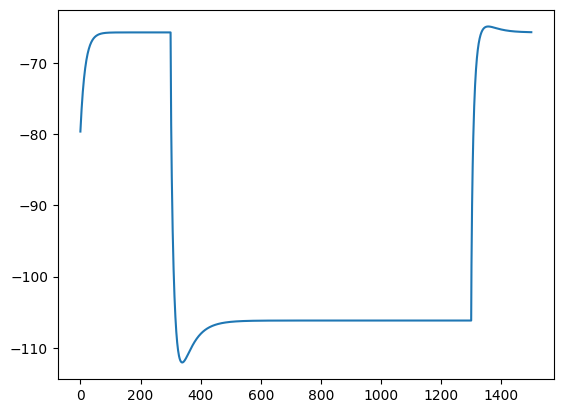

In [ ]:
stim = h.IClamp(h.soma[0](0.5))
stim.amp = -1
stim.delay = 300.0
stim.dur = 1000
h.tstop = 1500.0
h.dt = 0.1
h.steps_per_ms = 1 / h.dt

v = h.Vector().record(h.soma[0](0.5)._ref_v)
h.finitialize()
h.run()
plt.plot(v.as_numpy()[::10])

In [ ]:
gpp = ACTPassiveModule.compute_gpp(v.as_numpy(), h.dt, stim.delay, stim.delay+stim.dur, stim.amp)
print(f"gpp.R_in: {gpp.R_in} (MOhm)")
print(f"gpp.tau1: {gpp.tau1} (ms)")
print(f"gpp.tau2: {gpp.tau2} (ms)")
print(f"gpp.sag_ratio: {gpp.sag_ratio}\n")

print(f"target_metrics['Rin (MOhm)']['mean']: {target_metrics['Rin (MOhm)']['mean']}")
print(f"target_metrics['Tau (ms)']['mean']: {target_metrics['Tau (ms)']['mean']}")
print(f"target_metrics['Sag ratio']['mean']: {target_metrics['Sag ratio']['mean']}")

print(f"R_in error: {abs(gpp.R_in - target_metrics['Rin (MOhm)']['mean']):.3}")
print(f"tau1 error: {abs(gpp.tau1 - target_metrics['Tau (ms)']['mean'] / 1000):.2}")
print(f"tau2 error: {abs(gpp.tau2 - target_metrics['Tau (ms)']['mean'] / 1000)}") # not why there is tau1 and tau2
print(f"sag_ratio error: {abs(gpp.sag_ratio - target_metrics['Sag ratio']['mean'])}")

gpp.R_in: 46.29300479913296 (MOhm)
gpp.tau1: 7.9 (ms)
gpp.tau2: 55.300000000000004 (ms)
gpp.sag_ratio: 0.12709574503665885

target_metrics['Rin (MOhm)']['mean']: 195.4
target_metrics['Tau (ms)']['mean']: 15.6
target_metrics['Sag ratio']['mean']: 0.85
R_in error: 1.49e+02
tau1 error: 7.9
tau2 error: 55.284400000000005
sag_ratio error: 0.7229042549633411


In [ ]:
target_metrics

{'RMP': {'mean': -65.75, 'std': 3.76},
 'Rm (MOhm)': {'mean': 188.7, 'std': 9736},
 'Cm (pF)': {'mean': 96.46, 'std': 50.01},
 'Tau (ms)': {'mean': 15.6, 'std': 8.6},
 'Sag ratio': {'mean': 0.85, 'std': 0.09},
 'Rheobase (pA)': {'mean': 90, 'std': 38.25},
 'Rin (MOhm)': {'mean': 195.4, 'std': 75.93}}

In [ ]:
# change soma area until R_in matches
if 'original_soma_diam' not in locals():
    original_soma_diam = h.soma[0](0.5).diam
if 'original_soma_L' not in locals():
    original_soma_L = h.soma[0].L

h.soma[0].diam = original_soma_diam * 0.6
h.soma[0].L = original_soma_L * 1

print(f"original_soma_diam: {original_soma_diam:.2f}")
print(f"original_soma_L: {original_soma_L:.2f}")

print(f"soma diameter: {h.soma[0].diam:.2f}")
print(f"soma length: {h.soma[0].L:.2f}")

original_soma_diam: 12.66
original_soma_L: 12.66
soma diameter: 7.60
soma length: 12.66


gpp.R_in: 563.850868680615 (MOhm)
gpp.tau1: 7.1000000000000005 (ms)
gpp.tau2: 51.400000000000006 (ms)
gpp.sag_ratio: 0.11218991240343947

target_metrics['Rin (MOhm)']['mean']: 195.4
target_metrics['Tau (ms)']['mean']: 15.6
target_metrics['Sag ratio']['mean']: 0.85
R_in error: 3.68e+02
tau1 error: 7.1
tau2 error: 51.38440000000001
sag_ratio error: 0.7378100875965605


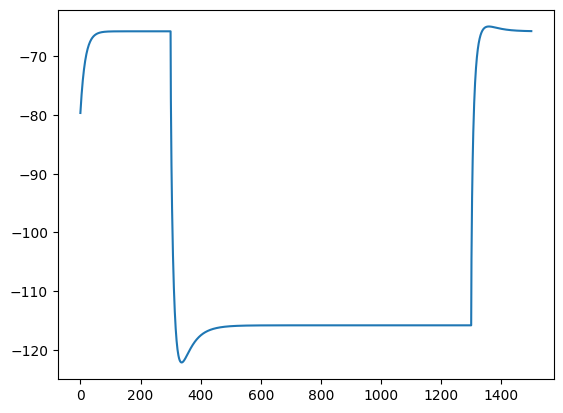

In [ ]:
stim = h.IClamp(h.soma[0](0.5))
stim.amp = -0.1
stim.delay = 300.0
stim.dur = 1000
h.tstop = 1500.0
h.dt = 0.1
h.steps_per_ms = 1 / h.dt

v = h.Vector().record(h.soma[0](0.5)._ref_v)
# h.finitialize()
h.run()
plt.plot(v.as_numpy()[::10])

# recompute passive properties
gpp = ACTPassiveModule.compute_gpp(v.as_numpy(), h.dt, stim.delay, stim.delay+stim.dur, stim.amp)
print(f"gpp.R_in: {gpp.R_in} (MOhm)")
print(f"gpp.tau1: {gpp.tau1} (ms)")
print(f"gpp.tau2: {gpp.tau2} (ms)")
print(f"gpp.sag_ratio: {gpp.sag_ratio}\n")

print(f"target_metrics['Rin (MOhm)']['mean']: {target_metrics['Rin (MOhm)']['mean']}")
print(f"target_metrics['Tau (ms)']['mean']: {target_metrics['Tau (ms)']['mean']}")
print(f"target_metrics['Sag ratio']['mean']: {target_metrics['Sag ratio']['mean']}")

print(f"R_in error: {abs(gpp.R_in - target_metrics['Rin (MOhm)']['mean']):.3}")
print(f"tau1 error: {abs(gpp.tau1 - target_metrics['Tau (ms)']['mean'] / 1000):.2}")
print(f"tau2 error: {abs(gpp.tau2 - target_metrics['Tau (ms)']['mean'] / 1000)}") # not why there is tau1 and tau2
print(f"sag_ratio error: {abs(gpp.sag_ratio - target_metrics['Sag ratio']['mean'])}")

Passive property procedure
1. Turn off all active conductances
2. Use soma surface area and target metrics: R_in, tau, and Vrest
to calculate: Cm, Gbar_leak, Eleak. Set Cm, Gbar_leak, Eleak everywhere.
3. Calculate R_in; adjust soma area until R_in matches

## Match Active Properties

In [ ]:
# set values for na, k channels
# adjust to get some spikes
# add calcium to adjust rheobase & F/I slope

## Match Synapse Properties